In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Hate-2001-2019-0.csv")

In [3]:
#Fill empty values with None for Weapon Type and clean up typos in dataset
df['WeaponType'].fillna('None',inplace = True)
df['WeaponType'].replace('Other ( bottle, rocks, spitting)', 'Other (bottle, rocks, spitting)', inplace=True)
df['WeaponType'].replace('Firearm (unknown whether handgun, rifle or shotgun', 'Firearm (unknown whether handgun, rifle or shotgun)', inplace=True)

#Replace rest of NaN values with 'Unknown'
df_new = df.replace(np.nan, 'Unknown', regex=True)

#rearrange columns to be more easily readable
columns_titles = ['MostSeriousBiasType','TotalNumberOfVictims','MostSeriousVictimType','TotalNumberOfSuspects','SuspectsRaceAsAGroup','MostSeriousUcr','MostSeriousUcrType','WeaponType','Offensive_Act','MostSeriousLocation','County','NCIC','ClosedYear','MonthOccurrence']
df_new=df_new.reindex(columns=columns_titles)

#One hot encode all necessary columns
TotalNumberOfVictims = df_new['TotalNumberOfVictims']
df_new.drop(['TotalNumberOfVictims'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfVictims],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousVictimType'], prefix='VictimType')],axis=1)
df_new.drop(['MostSeriousVictimType'],axis=1, inplace=True)
TotalNumberOfSuspects = df_new['TotalNumberOfSuspects']
df_new.drop(['TotalNumberOfSuspects'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfSuspects],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['SuspectsRaceAsAGroup'], prefix='SuspectsRace')],axis=1)
df_new.drop(['SuspectsRaceAsAGroup'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcr'], prefix='Ucr')],axis=1)
df_new.drop(['MostSeriousUcr'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcrType'], prefix='UcrType')],axis=1)
df_new.drop(['MostSeriousUcrType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['WeaponType'], prefix='Weapon')],axis=1)
df_new.drop(['WeaponType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['Offensive_Act'], prefix='Offense')],axis=1)
df_new.drop(['Offensive_Act'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousLocation'], prefix='Location')],axis=1)
df_new.drop(['MostSeriousLocation'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['County'], prefix='County')],axis=1)
df_new.drop(['County'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['NCIC'], prefix='Agency')],axis=1)
df_new.drop(['NCIC'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['ClosedYear'], prefix='Year')],axis=1)
df_new.drop(['ClosedYear'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MonthOccurrence'], prefix='Month')],axis=1)
df_new.drop(['MonthOccurrence'],axis=1, inplace=True)

In [4]:
df_new

,MostSeriousBiasType,TotalNumberOfVictims,VictimType_Business,VictimType_Financial,VictimType_Government,VictimType_Other,VictimType_Person,VictimType_Religious,TotalNumberOfSuspects,SuspectsRace_American Indian or Alaska Native,SuspectsRace_Asian,SuspectsRace_Asian/Pacific Islander,SuspectsRace_Black or African American,SuspectsRace_East Indian,SuspectsRace_East Indian/Asian Indian,SuspectsRace_Group of Multiple Races,SuspectsRace_Hispanic,SuspectsRace_Native Hawaiian or Other Pacific Islander,SuspectsRace_Unknown,SuspectsRace_White,Ucr_Aggravated Assault,Ucr_Arson,Ucr_Burglary,Ucr_Destruction/Damage/Vandalism,Ucr_Intimidation,Ucr_Larceny-Theft,Ucr_Motor Vehicle Theft,Ucr_Murder,Ucr_Rape,Ucr_Robbery,Ucr_Simple Assault,UcrType_Property Crimes,UcrType_Violent Crimes,"Weapon_Arson, fire","Weapon_Blunt object (blugeon, club, etc.)","Weapon_Firearm (unknown whether handgun, rifle or shotgun)",Weapon_Handgun,Weapon_Knife or other cutting or stabbing instrument,Weapon_None,"Weapon_Other (bottle, rocks, spitting)","Weapon_Other gun (pellet, BB, stun gun, etc.)","Weapon_Personal weapons (hands, feet, teeth, etc.)",Weapon_Poison,Weapon_Rifle,Weapon_Ropes or garrote strangulation or hanging,Weapon_Shotgun,Weapon_Unknown,Weapon_Vehicle,Offense_Annoying telephone calls/fax,Offense_Bombing,Offense_Cross burning,Offense_Damage to vehicle,Offense_Daubing of swastika,Offense_Disturbing public assembly/meeting,Offense_Explosion,Offense_Graffiti,Offense_Hanging in Effigy,Offense_Other,Offense_Rock throwing,Offense_Threatening letters/flyers/email,Offense_Unknown,Offense_Verbal slurs,Location_ATM Separate from Bank,Location_Abandoned/Condemned Structure,Location_Air/Bus/Train Terminal,Location_Amusement Park,Location_Arena/Stadium/Fairgrounds/Coliseum,Location_Auto Dealership New/Used,Location_Bank/Savings and Loan,Location_Bar/Night Club,Location_Camp/Campground,Location_Church/Synagogue/Temple,Location_Commercial/Office Building,Location_Community Center,Location_Construction Site,Location_Convenience Store,Location_Daycare Facility,Location_Department/Discount Store,Location_Dock/Wharf/Freight/Modal Terminal,Location_Drug Store/Dr Office/Hospital,Location_Farm Facility,Location_Field/Woods/Park,Location_Gambling Facility/Casino/Race Track,Location_Government/Public Building,Location_Grocery/Supermarket,Location_Highway/Road/Alley/Street,Location_Hotel/Motel/etc.,Location_Industrial Site,Location_Jail/Prison,Location_Lake/Waterway/Beach,Location_Liquor Store,Location_Other/Unknown,Location_Park/Playground,Location_Parking Lot/Garage,Location_Rental Storage Facility,Location_Residence/Home/Driveway,Location_Rest Area,Location_Restaurant,Location_School-College/University,Location_School-Elementary/Secondary,Location_School/college,Location_Service/Gas Station,Location_Shelter-Mission/Homeless,Location_Shopping Mall,Location_Specialty Store (TV/Fur/etc.),Location_Tribal Lands,County_1,County_2,County_3,County_4,County_5,County_6,County_7,County_8,County_9,County_10,County_11,County_12,County_13,County_14,County_15,County_16,County_17,County_18,County_19,County_20,County_21,County_22,County_23,County_24,County_25,County_26,County_27,County_28,County_29,County_30,County_31,County_32,County_33,County_34,County_35,County_36,County_37,County_38,County_39,County_40,County_41,County_42,County_43,County_44,County_45,County_47,County_48,County_49,County_50,County_51,County_52,County_53,County_54,County_55,County_56,County_57,County_58,Agency_0101,Agency_0103,Agency_0104,Agency_0105,Agency_0106,Agency_0107,Agency_0109,Agency_0112,Agency_0113,Agency_0115,Agency_0130,Agency_0402,Agency_0404,Agency_0497,Agency_0701,Agency_0702,Agency_0704,Agency_0705,Agency_0708,Agency_0709,Agency_0710,Agency_0712,Agency_0714,Agency_0724,Agency_0902,Agency_100,Agency_1000,Agency_1001,Agency_1002,Agency_1003,Agency_1004,Agency_1005,Agency_1006,Agency_1007,Agency_1008,Agency_101,Agency_1011,Agency_1012,Agency_1013,Agency_1015,Agency_1017,Agency_102,Agency_103,Agency_104,Agency

In [5]:
#separate data into labels and data points
y_labels = df_new['MostSeriousBiasType']
x_data = df_new.iloc[:, 1:772]

In [6]:
#split data into training and testing sets and shuffle before splitting
x_Train, x_Test, y_Train, y_Test = train_test_split(x_data, y_labels, shuffle = True, test_size = .2)

In [7]:
#scale the data/normalize the data so that the features do not broadly vary
scaler = StandardScaler()
scaler.fit(x_Train)

x_Train = scaler.transform(x_Train)
x_Test = scaler.transform(x_Test)

In [22]:
#create an empty list to store accuracy values
accuracy = []

#create different RF classifiers by changing the n_estimators every iteration
for n in range(25,525,25):
    #Build the Random Forest Classifier
    randFC=RandomForestClassifier(n_estimators=n)

    #train the classifier
    randFC.fit(x_Train,y_Train)
    
    #make predictions for testing data by using classifier
    y_pred=randFC.predict(x_Test)

    #save accuracy of our classifier each iteration
    acc = accuracy_score(y_Test, y_pred)
    accuracy.append(acc)
    

In [10]:
import matplotlib.pyplot as plt
estimators = list(range(25,525,25))
plt.plot(estimators,accuracy)
plt.title('Accuracy vs N-Estimators')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')

NameError: name 'accuracy' is not defined

In [27]:
np.argmax(accuracy)
Nvaluemax2 = estimators[np.argmax(accuracy)]
maxaccuracy2 = accuracy[np.argmax(accuracy)]
print(Nvaluemax2)
print(maxaccuracy2)

425
0.6607529208135007


In [8]:
#create an empty list to store accuracy values
accuracy1 = []
for n in range(25,525,25):
    print(n)
    #build the Knn classifier
    knnclass = KNeighborsClassifier(n_neighbors=n)
    #train the classifier
    knnclass.fit(x_Train, y_Train)
    #make predictions for testing data by using the classifier
    y_pred = knnclass.predict(x_Test)
    #save the accuracy score for each iteration
    acc = accuracy_score(y_Test, y_pred)
    accuracy1.append(acc)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500


In [12]:
estimators = list(range(25,525,25))
np.argmax(accuracy1)
Nvaluemax1 = estimators[np.argmax(accuracy1)]
maxaccuracy1 = accuracy1[np.argmax(accuracy1)]
print(Nvaluemax1)
print(maxaccuracy1)

175
0.6527477282561661


Text(0, 0.5, 'Accuracy')

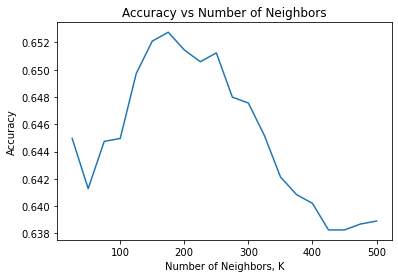

In [13]:
import matplotlib.pyplot as plt
estimators = list(range(25,525,25))
plt.plot(estimators,accuracy1)
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors, K')
plt.ylabel('Accuracy')